In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from postprocess_utils import *
import pandas as pd
import sqlalchemy

In [3]:
import pickle

In [4]:
with open('alpha_datalist_expanded.dat', 'rb') as f:
    alpha_datalist = pickle.load(f)

In [5]:
alpha_datalist = pd.DataFrame(alpha_datalist)

In [6]:
# Loaded from other notebook
%store -r sigmoid_df

#### Takeaways 1-3

In [7]:
# Takeaways 1-3: Ideal selection performance for sparse settings is achieved by Elastic Net with 
# empirical Bayes selection and UoI/SCAD/MCP with BIC, transitioning to cross-validated algorithms in dense
# settings

# Plot: Overlay the sigmoid saturation levels vs. sparsity averaged over case 1/2 for the algorithms for the 

# Plot: In the 'ideal case', cross-validated SCAD/MCP are robust, as is BIC and gMDL. Co-plot these

In [8]:
sparsity = np.unique(sigmoid_df['sparsity'].values)

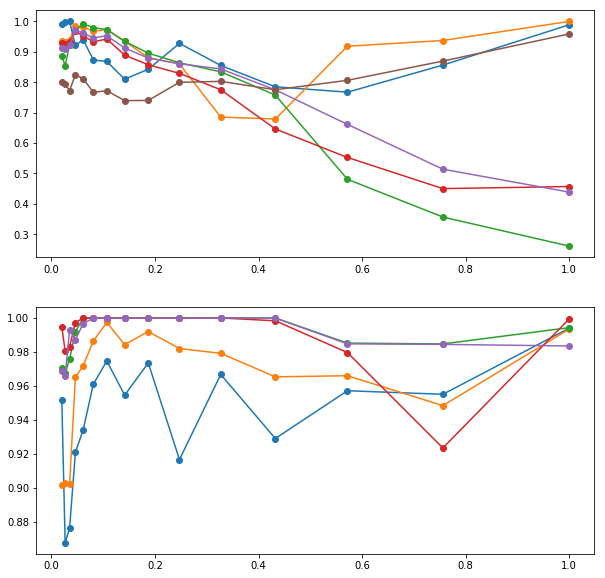

In [9]:
# Plot 1: Take case 1 and case 2 and plot the average saturation parameter across sparsity for 
# (1) Elastic Net with empirical Bayes selection
# (2) SCAD/MCP/UoI with BIC
# (3) representative cross-validated algorithm

fig, ax = plt.subplots(2, 1, figsize = (10, 10))

df1a = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='empirical_bayes',
                       df='EN')
df1b = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='empirical_bayes',
                       df='SCAD')

df2a = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='BIC', df='UoI Lasso')
df2b = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='BIC', df='SCAD')
df2c = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='BIC', df='MCP')
df3 = apply_df_filters(sigmoid_df, caseno=[1,2], selection_method='CV', df='SCAD')

dframes = [df1a, df1b, df2a, df2b, df2c, df3]
Y = []

for i, dframe in enumerate(dframes):
    Y.append([])
    
    for j, s in enumerate(sparsity):
        df_s = apply_df_filters(dframe, sparsity=s)
        xx = []
        for row in range(df_s.shape[0]):
            if not np.any(np.isnan(df_s.iloc[row]['coefs'])):
                xx.append(min(1, df_s.iloc[row]['coefs'][0] + df_s.iloc[row]['coefs'][-1]))
                
        Y[i].append(np.mean(xx))        
        
    ax[0].plot(sparsity, Y[i], '-o')
    
df1a = apply_df_filters(sigmoid_df, caseno=3, selection_method='CV', df='SCAD')
df1b = apply_df_filters(sigmoid_df, caseno=3, selection_method='CV', df='MCP')

df2 = apply_df_filters(sigmoid_df, caseno=3, selection_method='BIC', df='UoI Lasso')

df3a = apply_df_filters(sigmoid_df, caseno=3, selection_method='empirical_bayes', df='UoI Lasso')
df3b = apply_df_filters(sigmoid_df, caseno=3, selection_method='gMDL', df='UoI Lasso')

dframes = [df1a, df1b, df2, df3a, df3b]
Y = []

for i, dframe in enumerate(dframes):
    Y.append([])
    
    for j, s in enumerate(sparsity):
        df_s = apply_df_filters(dframe, sparsity=s)
        xx = []
        for row in range(df_s.shape[0]):
            if not np.any(np.isnan(df_s.iloc[row]['coefs'])):
                xx.append(min(1, df_s.iloc[row]['coefs'][0] + df_s.iloc[row]['coefs'][-1]))
                
        Y[i].append(np.mean(xx))        
        
    ax[1].plot(sparsity, Y[i], '-o')

In [ ]:
# Keep in mind this is a low correlation regime. We can use the previous plots, restricted to just a few of 
# the best selection methods above, that in highly correlated designs the adaptive methods do not behave well

#### Takeaways 4-5

In [ ]:
# Subplot 1: Demonstrate low sensitivity of Elastic Net + AIC and Lasso + BIC to correlations
# Subplot 1b: Illustrate how this does not lead to good selection except in dense cases
## ^^ This can be left to the supplementary information (not a core point)

# Plot: Average together all algorithms + selection methods that behave analogously, and contrast with the AIC
# and CV typical behavior

# Not sure what to do here... perhaps defer to supplementary figure

# Except for AIC and CV - there is a huge sensitivity to coerrelations for the sparsest models

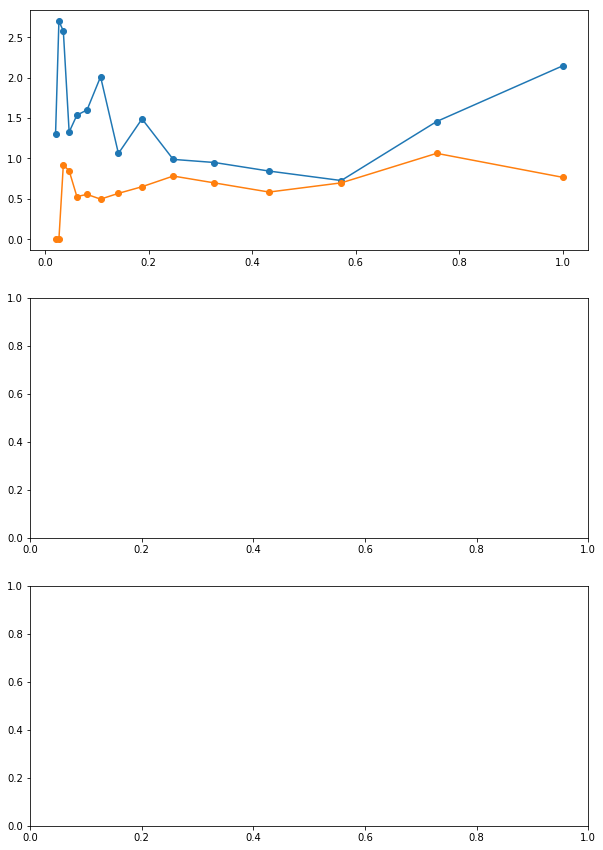

In [10]:
fig, ax = plt.subplots(figsize = (10, 7.5))

# Average together BIC, gmDL, empirical_bayes for all algorithms
df1 = apply_df_filters(sigmoid_df, caseno=[1, 2, 3], 
                       selection_method=['AIC', 'BIC', 'gMDL', 'empirical_bayes',                                                                       'CV'], df=['UoI Lasso', 'SCAD', 'MCP', 'Lasso'])

dframes = [df1a, df1b, df2]
Y = []

for i, dframe in enumerate(dframes):
    Y.append([])
    
    for j, s in enumerate(sparsity):
        df_s = apply_df_filters(dframe, sparsity=s)
        xx = []
        for row in range(df_s.shape[0]):
            if not np.any(np.isnan(df_s.iloc[row]['coefs'])):
                xx.append(df_s.iloc[row]['coefs'][1])
                
        Y[i].append(np.mean(xx))        
        
    ax[0].plot(sparsity, Y[i], '-o')

#### Takeaway 6

In [ ]:
# Plot: Take the oracle and the argmax over (algorithm, selection method) for sparsity vs. correlation for
# the three cases

# Subplot: plot heatmaps of the selection accuracy
# Subplot: As a function of sparsity, plot the location of the transition parameter (oracle and argmax)

In [7]:
sparsity = np.unique(sigmoid_df['sparsity'].values)

In [8]:
algorithms = np.unique(sigmoid_df['df'].values)

In [9]:
algorithms

array(['EN', 'Lasso', 'MCP', 'SCAD', 'UoI Lasso'], dtype=object)

In [10]:
from scipy import stats

In [11]:
# For the three cases, plot colormaps over sparsity and alpha of the oracle selection accuracy and the argmax
# over real instantiations of (algorithm, selection method)

In [12]:
import pickle

In [13]:
with open('alpha_datalist_expanded.dat', 'rb') as f:
    alpha_datalist = pickle.load(f)

In [14]:
alpha_datalist = pd.DataFrame(alpha_datalist)

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

# restrict to a particular betawidth

# Case 1
df1 = apply_df_filters(alpha_datalist, kappa=1, np_ratio=4, betawidth=np.inf)

# Case 2
df2 = apply_df_filters(alpha_datalist, kappa=5, np_ratio=2, betawidth=np.inf)

# Case 3
df3 = apply_df_filters(alpha_datalist, kappa=10, np_ratio=16, betawidth=np.inf)

# Arrange by sparsity and alpha ordering --> this will in general give different alpha values --> what to
# do about this? Perhaps jagged plot is possible

sparsity = np.unique(df1['sparsity'].values)
# Create list of lists
y = []
z1 = []
z2 = []

for i, s in enumerate(sparsity):
    df_s = apply_df_filters(df1, sparsity=s)
#    alpha = np.unique(df_s['alpha'].values)
#    y.append(alpha)
    # Take max of oracle selection method across algorithms
    oracle_df = apply_df_filters(df_s, selection_method='oracle')
    max_df = apply_df_filters(df_s, selection_method=['AIC', 'BIC', 'CV', 'gMDL', 'empirical_bayes'])
    assert(oracle_df.shape[0] == 5)
    assert(max_df.shape[0] == 25)
    
    alphas = oracle_df.iloc[0]['alpha']

    z1.append(np.zeros(alphas.size))
    z2.append(np.zeros(alphas.size))
    
    for j, alpha_ in enumerate(alphas):
        sa = [oracle_df.iloc[k]['sa'][oracle_df.iloc[k]['alpha'].index] for k in range(oracle_df.shape[0])
              if ]
        z1[i][j] = np.nanmax(sa)
        
        sa = [max_df.iloc[k]['sa'][j] for k in range(max_df.shape[0])]
        z2[i][j] = np.nanmax(sa)

pdb.set_trace()

> <ipython-input-20-895cc6e941da>(43)<module>()
-> z1[i][j] = np.nanmax(sa)
(Pdb) !s
0.24730050228846648
(Pdb) !j
79
(Pdb) oracle_df.iloc[0]['sa'].size
80
(Pdb) oracle_df.iloc[1]['sa'].size
80
(Pdb) oracle_df.iloc[2]['sa'].size
80
(Pdb) oracle_df.iloc[3]['sa'].size
79
(Pdb) oracle_df.iloc[4]['sa'].size
80
(Pdb) oralce_df.iloc[3]
*** NameError: name 'oralce_df' is not defined
(Pdb) 
*** NameError: name 'oralce_df' is not defined
(Pdb) !oracle_df.iloc[3]
df_name                                                          SCAD
betawidth                                                         inf
sparsity                                                     0.247301
alpha               [3.915030832749191e-09, 1.0052525118124515e-06...
sa                  [0.37861955438371325, 0.40676916636533794, 0.6...
kappa                                                               1
selection_method                                               oracle
np_ratio                                             

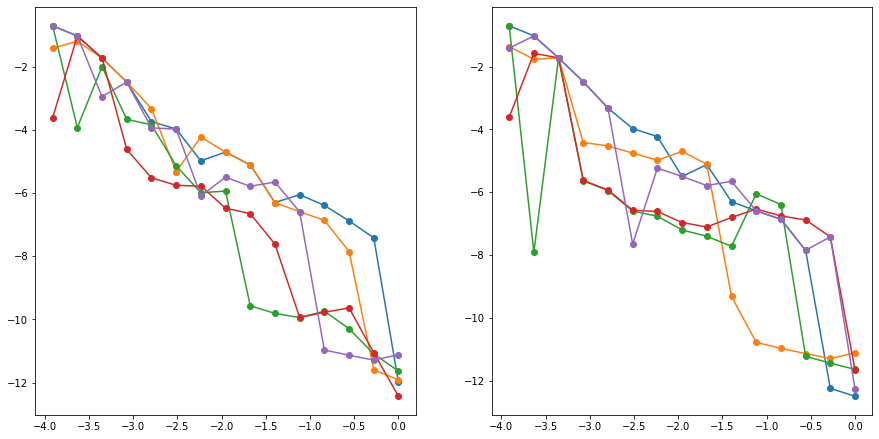

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))

# Subplot 1
# Take the average and standard deviation of the transition parameter location across all algorithms + selection
# method pairs

# Max across selection methods

df1 = apply_df_filters(sigmoid_df, selection_method = ['AIC', 'BIC', 'gMDL', 'empirical_bayes', 'CV'],
                       caseno=3)
df2 = apply_df_filters(sigmoid_df, selection_method='oracle', caseno=3)

dframes = [apply_df_filters(df1, df=algorithms[i]) for i in range(len(algorithms))]

Y = []
Ystd = []
Yiqr = []


for i, dframe in enumerate(dframes):
    Y.append([])
    Ystd.append([])
    Yiqr.append([])
    for j, s in enumerate(sparsity):
        df_s = apply_df_filters(dframe, sparsity=s)
        xx = []
        for row in range(df_s.shape[0]):
            if not np.any(np.isnan(df_s.iloc[row]['coefs'])):
                xx.append(df_s.iloc[row]['coefs'][2])
                
        # Instead of the mean, append the max
        Y[i].append(max(xx))  
        # Try interquartile range instead
        Ystd[i].append(np.std(xx))
        Yiqr[i].append(stats.iqr(xx))
        
    ax[0].plot(np.log(sparsity), Y[i], '-o')    
    
# Max across algorithms
df1 = apply_df_filters(sigmoid_df,
                       caseno=3)

dframes = [apply_df_filters(df1, selection_method=sm) 
           for sm in ['AIC', 'BIC', 'gMDL', 'empirical_bayes', 'CV']]

Y = []
Ystd = []
Yiqr = []

for i, dframe in enumerate(dframes):
    Y.append([])
    Ystd.append([])
    Yiqr.append([])
    for j, s in enumerate(sparsity):
        df_s = apply_df_filters(dframe, sparsity=s)
        xx = []
        for row in range(df_s.shape[0]):
            if not np.any(np.isnan(df_s.iloc[row]['coefs'])):
                xx.append(df_s.iloc[row]['coefs'][2])            
        # Instead of the mean, append the max
        Y[i].append(max(xx))  
        # Try interquartile range instead
        Ystd[i].append(np.std(xx))
        Yiqr[i].append(stats.iqr(xx))
        
    # Toss out the bad gMDL data point

    ax[1].plot(np.log(sparsity), Y[i], '-o')

    

#### Takeaway 7

In [ ]:
# Worst case scenario: Nothing is doing well - so what do you do? Elastic Net with gMDL has the highest 
# offsets